<h1 style='text-align: center;'> Machine Learning Project 1 </h1>
<h3 style='text-align: center;'> By Sri Das </h3>

<h2 style='text-align: center;'> NYC House price prediction </h2>

### Importing required packages

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression, Ridge, Lasso

### Importing Data and EDA

In [24]:
#Loading the data
data = pd.read_csv('nyc-rolling-sales.csv')
data.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [25]:
data.shape

(84548, 22)

In [26]:
data.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


The above result shows that some features such as 'SALE PRICE' is missing and also the min value for 'ZIP CODE' 
and 'YEAR BUILT' are zeros, which in these cases are missing values. Let's look at the data types of all the variables.

In [27]:
data.dtypes

Unnamed: 0                         int64
BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                  int64
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                        object
SALE DATE                         object
dtype: object

As suspected, variables 'SALE PRICE', 'LAND SQUARE FEET' and 'GROSS SQUARE FEET' are not listed as numerical data type. Whereas in the data, these variables have numerical values. Before proceeding further, the data types for these variables needs to be changed. 

In [28]:
# Checking for null values
data.isnull().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

There are no null values in the data but as noted before there are missing values in the data (as zeros) so the data needs to be checked for missing values. Before that let's change the data types of the three numerical variables.

In [29]:
# Function to change the data type. It takes a list of variables and the data type to which they have to be changed.
# It captures any errors in the process and prints the error message

def chng_dtype(feature_list, dtype): 
    for i in feature_list:
        try:
            data[i] = data[i].astype(dtype)
        except ValueError as ve:
            err = str(ve)
            char = err.partition(':')[2]
            print ('{} cannot be converted to int as it has characters {}'.format(i,char)) 

In [30]:
#list of variables that need a change of data type
fetrs = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']

In [31]:
#Using the chng_dtype function on the above list
chng_dtype(fetrs, int)

LAND SQUARE FEET cannot be converted to int as it has characters  ' -  '
GROSS SQUARE FEET cannot be converted to int as it has characters  ' -  '
SALE PRICE cannot be converted to int as it has characters  ' -  '


All the three variables have missing values in the form of ' - '. 

In [32]:
#Replacing these missing values with NaN
err =  ' -  '
for i in fetrs: 
    ser = data[i].replace(err, np.nan)
    data[i] = pd.to_numeric(ser)

In [33]:
data.isnull().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

### Data Visualization

In [34]:
# Extracting the numerical features to plot against the target variable
num = data.dtypes == 'int'
flt = data.dtypes == 'float'
num_ftrs = list(num[num].index)
num_ftrs.extend(list(flt[flt].index))
num_ftrs.remove('SALE PRICE')

In [35]:
plot_dep = data.drop('SALE PRICE', axis=1)
plot_indep = data['SALE PRICE']

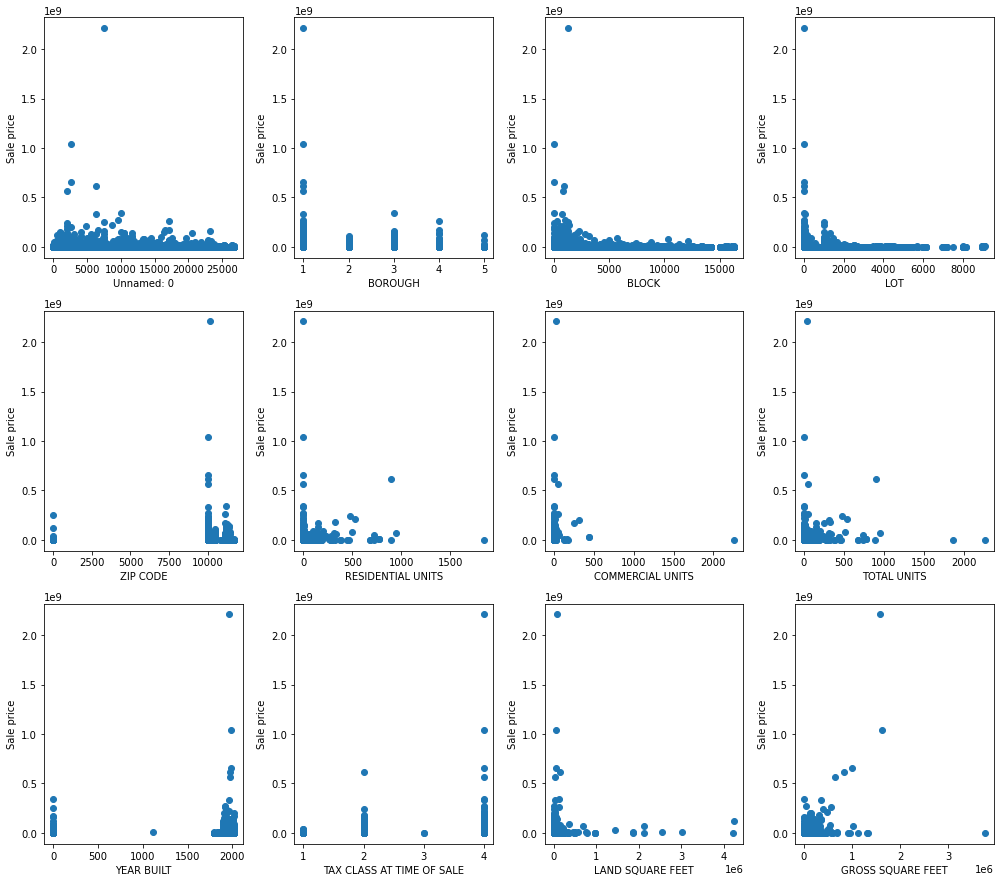

In [36]:
a = 4  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize = (14, 16))

for i in num_ftrs : 
    plt.subplot(a,b,c)
    plt.scatter(plot_dep[i], plot_indep)
    plt.xlabel(i)
    plt.ylabel('Sale price')
    c = c +1 
fig.tight_layout()
plt.show()

From the above plots, it can be seen that there a few outliers in the target variable (over 0.5e9). There are also missing values (0) in 'ZIP CODE', 'YEAR BUILT' and 'SALE PRICE'. The target variable remains independent(flat) w.r.t 'Unnamed:0', 'BLOCK' and 'LOT'. Also it can be seen that although listed as numerical, 'BOROUGH', 'ZIP CODE', 'YEAT BUILT' and 'TAX CLASS AT TIME OF SALE' are categorical by nature. Before proceeding further lets look if there are any correlations between the data features using a heatmap. 

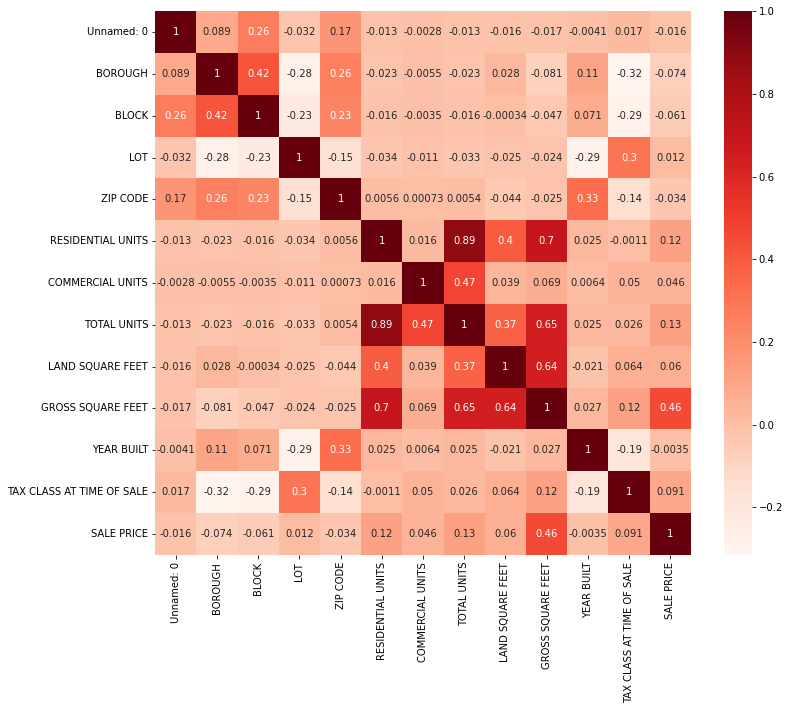

In [37]:
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

The correlation matrix shows that the sale price has correlation with gross square feet area, larger the area. higher the sale price. Gross square feet area itself is correlated to residential units, total units and land sqaure feet. Residential units is highly correlated to total units. As expected the geographical location features such as borough, zip code, lot and block are correlated to each other.

### Data preprocessing

In [38]:
# Dropping the rows with nan values 

data.dropna(axis=0, inplace=True)
data.shape

(48244, 22)

In [39]:
# Removing the outliers

data = data.loc[data['SALE PRICE'] < 0.5e9]
data = data[data['YEAR BUILT'] > 1500]
data = data[data['ZIP CODE'] != 0]
data = data[data['RESIDENTIAL UNITS'] < 1000]
data = data[data['COMMERCIAL UNITS'] < 500]
data = data[data['TOTAL UNITS'] < 1000]
data = data[data['LAND SQUARE FEET'] < 2e6]
data = data[data['GROSS SQUARE FEET'] < 2e6]
data.shape

(45308, 22)

In [40]:
# Checking for more missing values 
for i in num_ftrs : 
    print('{} has {} missing values as 0'.format(i, len(data[data[i] == 0]))) 

Unnamed: 0 has 0 missing values as 0
BOROUGH has 0 missing values as 0
BLOCK has 0 missing values as 0
LOT has 0 missing values as 0
ZIP CODE has 0 missing values as 0
RESIDENTIAL UNITS has 6478 missing values as 0
COMMERCIAL UNITS has 41310 missing values as 0
TOTAL UNITS has 3905 missing values as 0
YEAR BUILT has 0 missing values as 0
TAX CLASS AT TIME OF SALE has 0 missing values as 0
LAND SQUARE FEET has 8345 missing values as 0
GROSS SQUARE FEET has 8518 missing values as 0


Most values for 'COMMERCIAL UNITS' are missing variable and hence it can dropped from the analysis. 

In [41]:
data.drop('COMMERCIAL UNITS', axis=1, inplace=True)

In [42]:
# Checking for missing values in Sale price
len(data[data['SALE PRICE'] == 0])

9145

In [43]:
# Imputing missing values with mean

imp_ftrs =  ['RESIDENTIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE' ]
imputer = SimpleImputer(missing_values=0, strategy='mean')
imputer = imputer.fit(data[imp_ftrs])
data[imp_ftrs] = imputer.transform(data[imp_ftrs])

In [45]:
# Dropping the variables that are categorical in nature
data.drop(columns=['Unnamed: 0','BOROUGH', 'ZIP CODE','YEAR BUILT','BLOCK', 'LOT', 'TAX CLASS AT TIME OF SALE'], inplace=True)

### Modeling

Generating the input to the models with relevant features

In [47]:
X = data.drop(columns=["NEIGHBORHOOD", 'BUILDING CLASS CATEGORY','TAX CLASS AT PRESENT','EASE-MENT',
 'BUILDING CLASS AT PRESENT','ADDRESS', 'APARTMENT NUMBER', 'BUILDING CLASS AT TIME OF SALE','SALE DATE'], axis=1)
y = data['SALE PRICE']

In [55]:
# SPlitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y)

Here we are using three different regression models, Linear, Ridge and Lasso to model the data and evaluate using the score feature of the models

In [49]:
from sklearn.pipeline import make_pipeline
pipe1 = make_pipeline(StandardScaler(), LinearRegression())
pipe1.fit(X_train, y_train)
print(pipe1.score(X_train, y_train))
print(pipe1.score(X_test, y_test))

1.0
1.0


In [50]:
pipe2 = make_pipeline(StandardScaler(), Ridge())
pipe2.fit(X_train, y_train)
print(pipe2.score(X_train, y_train))
print(pipe2.score(X_test, y_test))

0.9999999989133538
0.9999999986628075


In [57]:
pipe3 = make_pipeline(StandardScaler(), Lasso())
pipe3.fit(X_train, y_train)
print(pipe3.score(X_train, y_train))
print(pipe3.score(X_test, y_test))

0.9999998768285258
0.9999999834418861


### Conclusion

The NYC real estate data has been analysed and cleaned before building a model for sale price prediction. The data had a lot of missing values in the form of characters and 0s. Some unavailable data has been imputed with the mean value of that variable. The data also consisted of more categorical variables than numerical variables. For this analysis and modeling only numerical variables were used. The price prediction was achieved by using three different regression models from sci kit learn: Linear, Ridge and Lasso. The model functioning in prediction of the price was evaluated using the 'score' of each model. The score from each model was an almost perfect result, which is '1'. This means the sale price was predicted without any error. This is not a realistic outcome as in real life there is always some error induced through one or other factor. The reason for this perfect score could be a simplistic model, we had built a simple model using very few independent variables. Going further, this model can be made more realistic by introducing the categorical variables for model building.  